In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [5]:
y.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [6]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


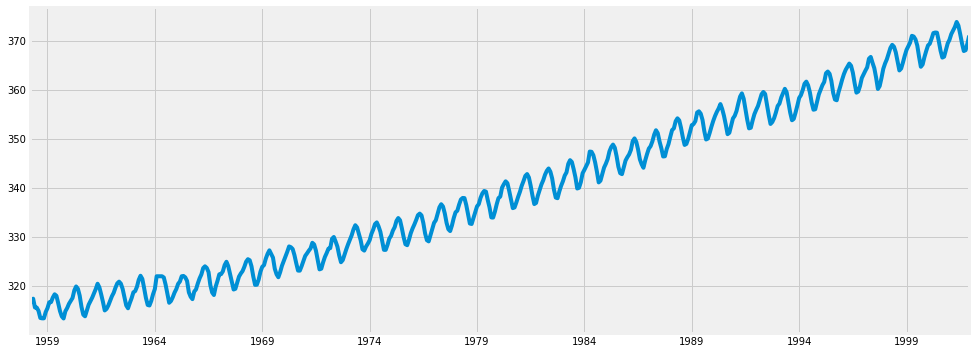

In [7]:
y.plot(figsize=(15, 6))
plt.show()

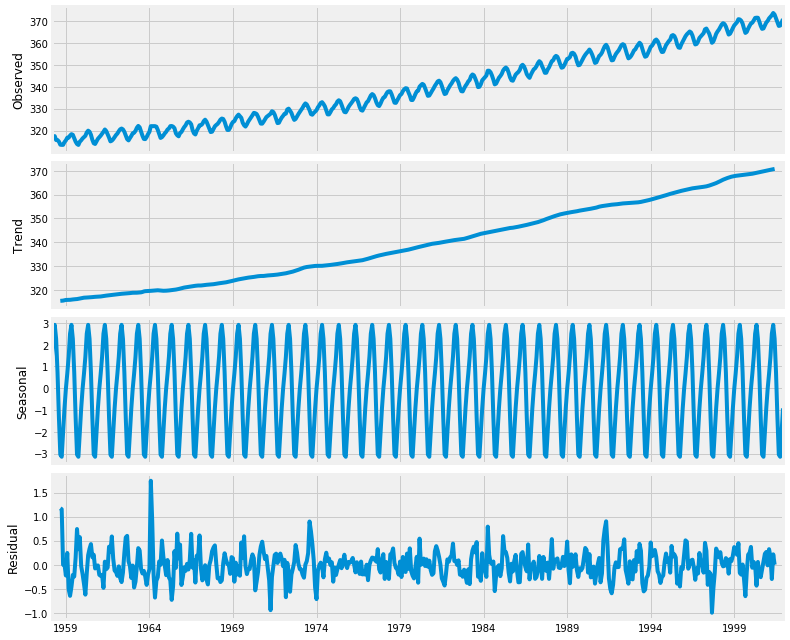

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.3436240438905
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727638053
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320021


c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878425699491
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.65789780726
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912827056
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754598261
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.6623270557275
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067304665
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716768207


c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1113.696716725417


c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:792.7163281768296
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893641971
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988676082
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194057
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:633.4425586468699
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.950175782907
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283760586145
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:478.32969081693074
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:323.3246526807239
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1371.187260233532
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1101.8410734302681
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:587.9479710198574
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:302.4949004407664
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:584.4333533197422
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:337.1999052306291
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:433.0863608138467
ARIMA

c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1372.6085881642894
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1199.4888107891402
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:586.4485732463568
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:305.6273820742473


c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:587.2021536380712


c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:396.7003070117672
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:433.5469464372751
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:284.35966118386864
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1324.311112732457


c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1060.935191443316
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:600.7412682874252


c:\users\anand\appdata\local\continuum\anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:312.13296334793273
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:593.6637754555269
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:349.2091465202103
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:440.13758839992397
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:293.7426223062059
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1262.6545542464787
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1052.0636724060191
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:581.3099935196991
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:295.9374060570654
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:576.864711171842
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:327.90491260367367
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:444.12436865303255
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:277.78009738850983


In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3184      0.092      3.445      0.001       0.137       0.500
ma.L1         -0.6257      0.077     -8.170      0.000      -0.776      -0.476
ar.S.L12       0.0010      0.001      1.724      0.085      -0.000       0.002
ma.S.L12      -0.8768      0.026    -33.800      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.630      0.000       0.089       0.106


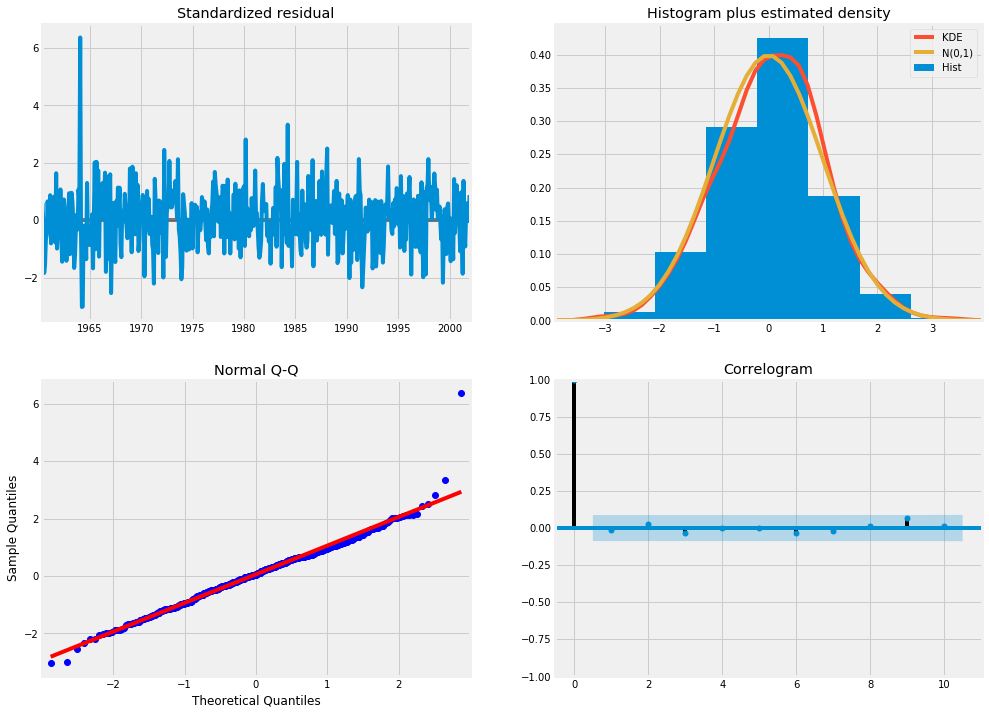

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

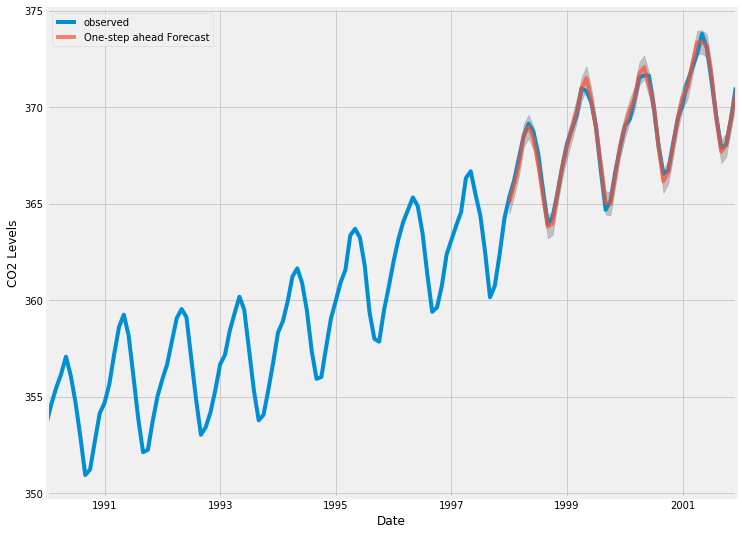

In [14]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [15]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [16]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

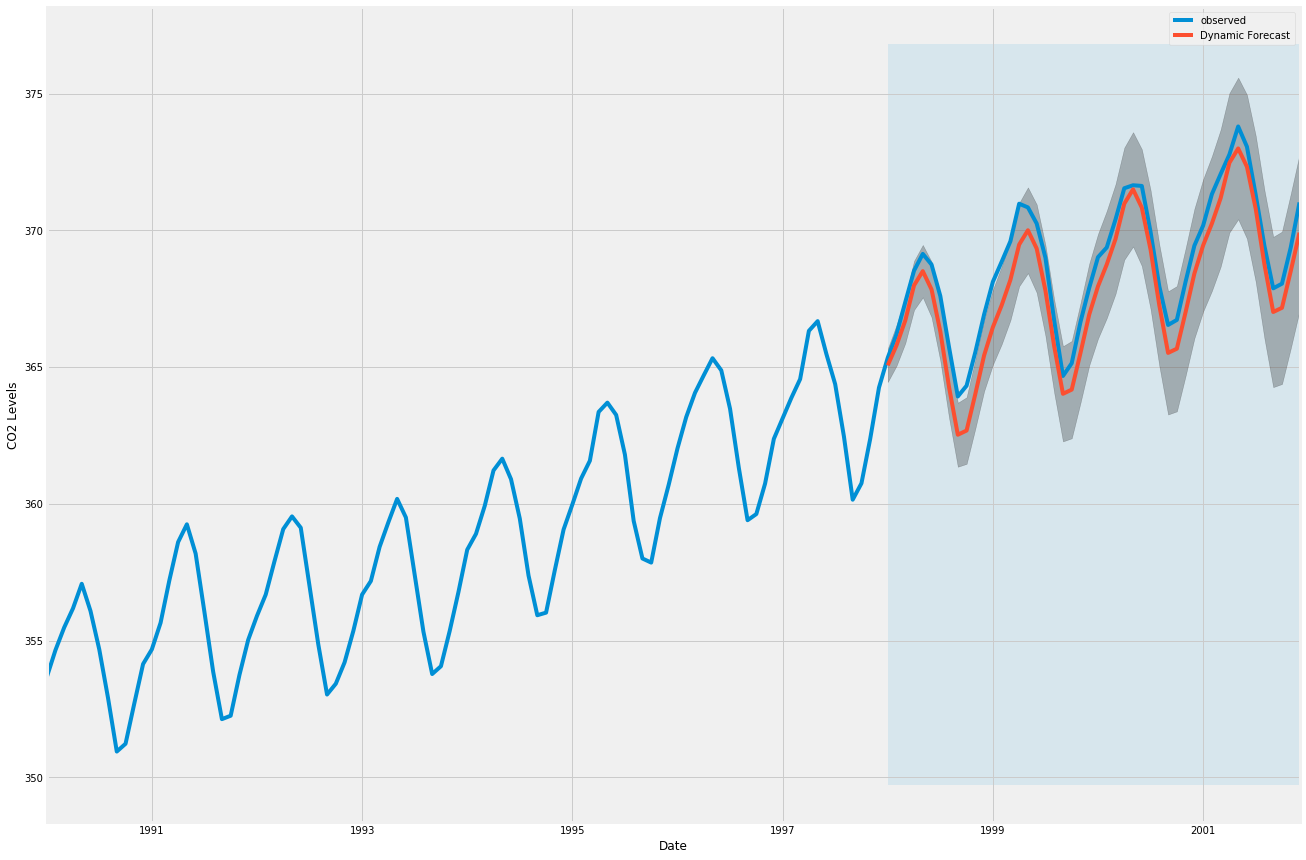

In [17]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [18]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [19]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

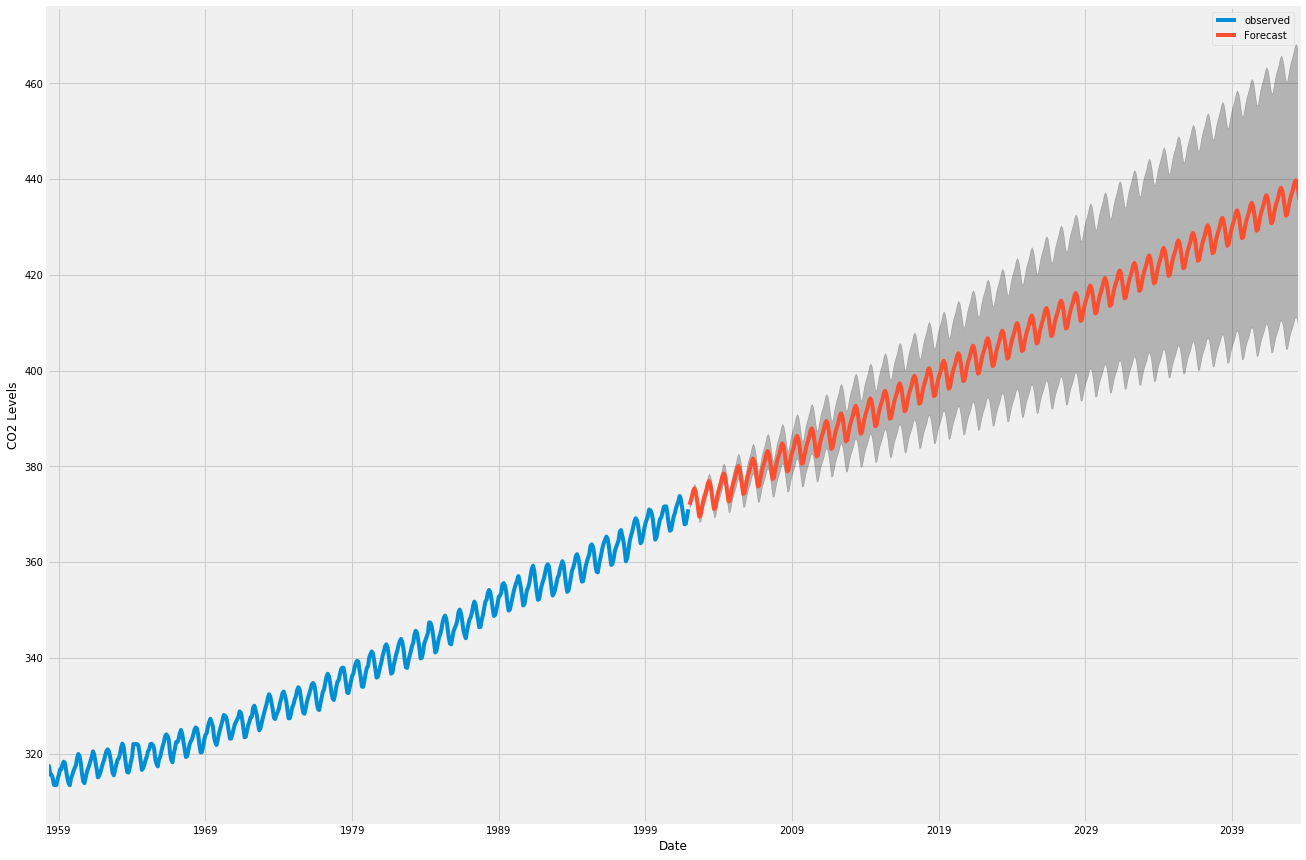

In [20]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()
